# <center>HW4


## P1

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import statsmodels.api as sm
data = pd.Series([134.8,	74.9,	110.1,	94.2,	79.3,
81.0,	111.9,	88.5,	101.5,	81.3,
54.1,	81.6,	124.9,	121.9,	81.0,
102.2,	58.6,	118.1,	81.0,	67.3,
83.3,	94.5,	118.3,	129.1,	116.3,
70.9,	104.8,	92.1,	77.4,	117.9,
108.9,	115.4,	84.1,	79.6,	91.9,
59.6,	65.7,	60.1,	119.4,	126.8,
101.8,	83.3,	77.9,	80.5,	80.2,
78.0,	99.4,	140.5,	73.6,	109.4])

In [65]:
# summary statistics
mean = data.mean()
median = data.median()
mini = data.min()
maxi = data.max()
q81 = data.quantile(0.125)
q41 = data.quantile(0.25)
q43 = data.quantile(0.75)
q87 = data.quantile(0.875)
std = data.std()
var = data.var()
skew = data.skew()
cv = std / mean
lexis = var / mean

output = pd.DataFrame({
    "Statistic": ["Mean", "Minimum", "Q81", "Q41", "Median", "Q43", "Q87", "Maximum",
                  "Standard Deviation", "Variance", "Coefficient of Variation", "LexusRate", "Skewness"],
    "Value": [mean, mini, q81, q41, median, q43, q87, maxi, std, var, cv, lexis, skew]
})
print(output)

                   Statistic       Value
0                       Mean   93.778000
1                    Minimum   54.100000
2                        Q81   71.237500
3                        Q41   79.375000
4                     Median   90.200000
5                        Q43  111.450000
6                        Q87  119.262500
7                    Maximum  140.500000
8         Standard Deviation   21.833295
9                   Variance  476.692771
10  Coefficient of Variation    0.232819
11                 LexusRate    5.083205
12                  Skewness    0.240011


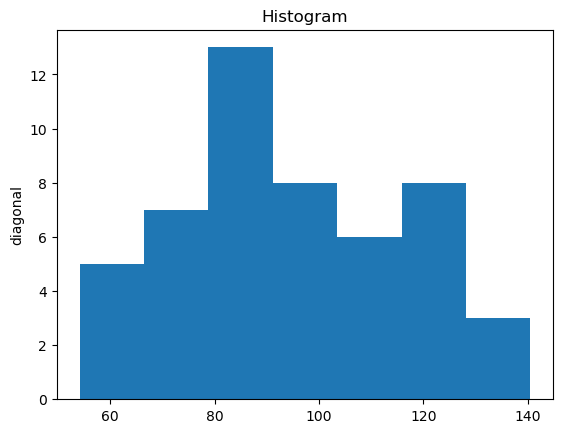

In [66]:
# hhistograms
plt.hist(data, bins=7)
plt.title('Histogram')
    #plt.xlabel('Value')
plt.ylabel('diagonal')
plt.show()

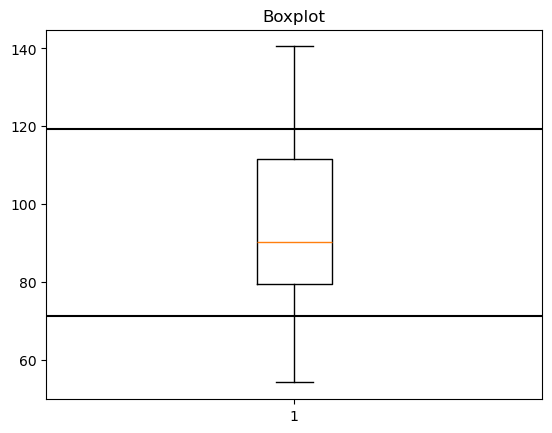

In [67]:
# box plot
plt.boxplot(data, vert=True)
plt.title('Boxplot')
    #plt.ylabel('Value')
plt.axhline(q87,color='k')
plt.axhline(q81,color='k')
plt.show()

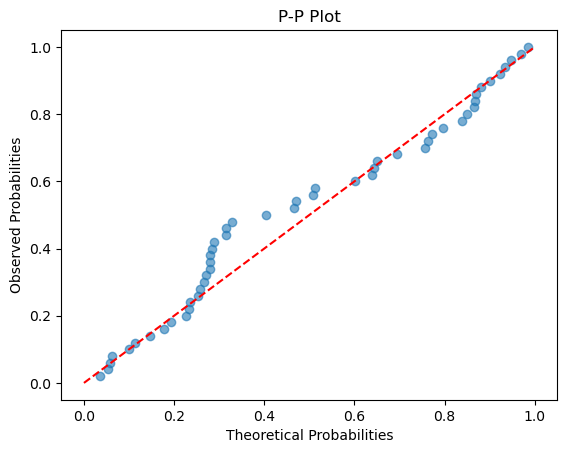

In [68]:
# P-P plot
sorted_data = data.sort_values().reset_index(drop=True)
p = st.norm.cdf(sorted_data, mean, std)
t = (sorted_data.index + 1) / len(sorted_data)
#print(t,p,len(t),len(p))

plt.scatter(p, t, alpha=0.6)
plt.title('P-P Plot')
plt.xlabel('Theoretical Probabilities')
plt.ylabel('Observed Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line

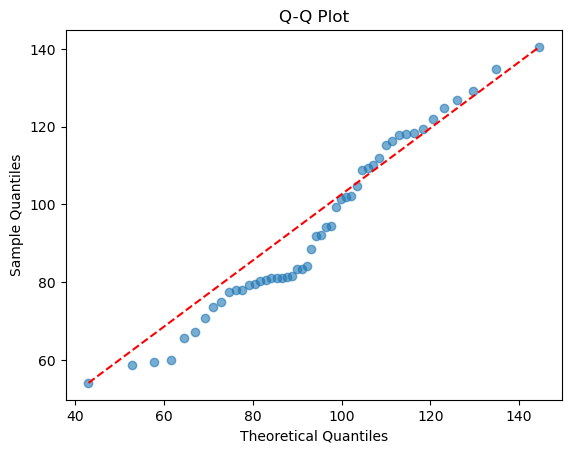

In [69]:
# Q-Q plot
q = st.norm.ppf(t-0.5/len(sorted_data),mean,std)
plt.scatter(q, sorted_data, alpha=0.6)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.plot([min(q), max(q)], [min(sorted_data), max(sorted_data)], color='red', linestyle='--')  # Reference line


In [70]:
# Chi-Square test
chi2, p_value = st.chisquare(data)

# K-S test
ks_stat, ks_pvalue = st.kstest(data, 'norm', args=(mean, std))

print("Chi-Square Test statistic:", chi2, "p-value:", p_value)
print("Kolmogorov-Smirnov Test statistic:", ks_stat, "p-value:", ks_pvalue)

Chi-Square Test statistic: 249.07703086011648 p-value: 1.3891521954434742e-28
Kolmogorov-Smirnov Test statistic: 0.15121403373800146 p-value: 0.18325752942199547


因此可以看作正态分布

## P2
（1）除了set5、6外均可以通过数据集的上下界判断出对应关系，set5、6由于有负数且上下界范围相似，故对应A或E，观察set5中位数以前的数据与正态分布很相似，因此这一部分Q-Q图应该近似直线，观察发现A前半段近似直线，故5对应A，6对应E，即：

    1F 2C 3D 4B 5A 6E

（2）

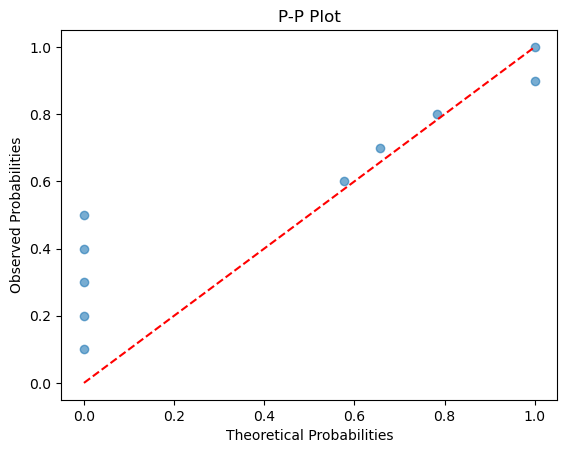

In [71]:
data = pd.Series([0.60,3.99,1.54,4.50,0.08,4.91,3.77,2.16,1.07,3.63])
# calculate mean and std-dev
mean = data.mean()
std = data.std()
# P-P plot
sorted_data = data.sort_values().reset_index(drop=True) #sort the data
p = st.uniform.cdf(sorted_data, mean, std)  # get probability of uniform distribution
t = (sorted_data.index + 1) / len(sorted_data)

plt.scatter(p, t, alpha=0.6)
plt.title('P-P Plot')
plt.xlabel('Theoretical Probabilities')
plt.ylabel('Observed Probabilities')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line

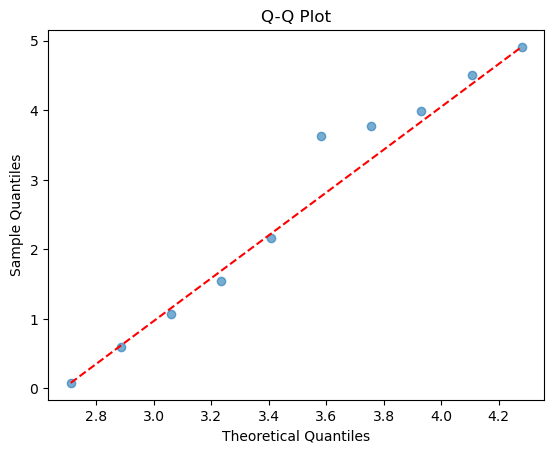

In [72]:
# Q-Q plot
q = st.uniform.ppf(t-0.5/len(sorted_data),mean,std)
plt.scatter(q, sorted_data, alpha=0.6)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.plot([min(q), max(q)], [min(sorted_data), max(sorted_data)], color='red', linestyle='--')  # Reference line

由P-P图可以看出并不符合均匀分布

（3）只要n足够大，那么对任何分布来说，拟合分布和实际分布的P-P图、Q-Q图都一样，因为根据大数定理和中心极限定理，只要n足够大，两个分布一定会更接近，因而P-P图、Q-Q图就会更接近45度倾斜的直线，进而是相同的

## P3
假设点的位置与小正方形有关，基于该假设如下计算卡方值

In [73]:
dr = [[0.427, 0.321], [0.343, 0.474], [0.558, 0.746], [0.032, 0.522], [0.604, 0.745], 
      [0.251, 0.31], [0.798, 0.037], [0.081, 0.95], [0.812, 0.453], [0.644, 0.92], 
      [0.951, 0.146], [0.155, 0.429], [0.525, 0.2], [0.219, 0.675], [0.845, 0.676]]

data = pd.DataFrame(dr,columns=['x','y'])
cnt = [0,0,0,0]
for id,point in data.iterrows():
    if point['x']<0.5:
        if point['y']<0.5:
            cnt[0] += 1
        else:
            cnt[1] += 1
    else:
        if point['y']<0.5:
            cnt[2] += 1
        else:
            cnt[3] += 1
E = 15/4
chi2 = 0
for i in cnt:
    chi2 += (i-E)**2/E
print(chi2)

0.19999999999999998


由于4个矩形有3个自由度，故卡方值与题目给出的参考值作比较，发现远小于，因此假设在95%置信区间不显著，即点的位置与小正方形无关